<a href="https://www.kaggle.com/code/sergioadauto/credit-da-sql?scriptVersionId=113855057" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Explocação e Análise de Crédito com SQL</h1>
<hr>
<p>Os dados utilizados nessa análise, trata-se de um recorte do repositório de análise de crédito do professor <a href="https://github.com/andre-marcos-perez/ebac-course-utils">André Perez</a>. Esse recorte foi necessário, devido ao custo operacional envolvendo as ferramentas de consulta query AWS <a href="https://aws.amazon.com/pt/athena/?whats-new-cards.sort-by=item.additionalFields.postDateTime&whats-new-cards.sort-order=desc">Athena</a> e serviço de armazenamento <a href="https://aws.amazon.com/pt/s3/">S3 Bucket</a>. Além disso, esses dados simulam informações de clientes, referentes uma base de dados de uma empresa de cartões de crédito.</p> 
<p><strong>Descrição dos Dados:</strong></p>
<ul>
    <li><em>idade</em> = idade do cliente
    <li><em>sexo</em> = sexo do cliente (F ou M)
    <li><em>dependentes</em> = número de dependentes do cliente
    <li><em>escolaridade</em> = nível de escolaridade do clientes
    <li><em>salario_anual</em> = faixa salarial do cliente
    <li><em>tipo_cartao</em> = tipo de cartao do cliente
    <li><em>qtd_produtos</em> = quantidade de produtos comprados nos últimos 12 meses
    <li><em>iteracoes_12m</em> = quantidade de iterações/transacoes nos ultimos 12 meses
    <li><em>meses_inativo_12m</em> = quantidade de meses que o cliente ficou inativo
    <li><em>limite_credito</em> = limite de credito do cliente
    <li><em>valor_transacoes_12m</em> = valor das transações dos ultimos 12 meses
    <li><em>qtd_transacoes_12m</em> = quantidade de transacoes dos ultimos 12 meses
</ul>
<h2>Exploração de Dados:</h2>
<p>Esse começo da explocação é a parte mais importante para compreender os dados que estão disponíveis para trabalho, vamos iniciar essa observação: 
<p><strong>Observando a quantidade de linhas que estão disponíveis na base de dados:</strong></p>
<p>SQL: <code>SELECT COUNT(*) AS qtd_linhas FROM credito;</code></p>
<img src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/1.png?raw=true">
<p>OBS: A base de dados original (disponível no repositório informado acima), é muito maior que esse recorte utilizando para essa análise.
<br>
<div>
    <p><strong>Para descobrir os tipos primitivos de cada coluna (variável):</strong></p>
    <p>SQL: <code>DESCRIBE credito;</code></p>
    <img src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/2.png?raw=true">
</div>
<p>Com a distinção dos tipos de cada variáveis, torna-se necessário a observação das colunas não numericas, para examinar a existência de elementos faltantes (ou nulos):   
<p><strong>Para identificar os níveis de escolaridade:</strong></p>
<p>SQL: <code>SELECT DISTINCT escolaridade FROM credito;</code></p>
<img align="center" width="20%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/3.png?raw=true">

<p><strong>Para observar os tipos distintos de estados civis dos clientes cadastrados:</strong></p>
<p>USando o comando SQL: <code>SELECT DISTINCT estado_civil FROM credito;</code></p>
<img align="center" width="20%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/4.png?raw=true">

<p><strong>Para observar a hierarquia dos salários anuais:</strong></p>
<p>SQL: <code>SELECT DISTINCT salario_anual FROM credito;</code></p>
<img align="center" width="20%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/5.png?raw=true">

<p><strong>Para distinguir os tipos de cartões de cada cliente:</strong></p>
<p>SQL: <code>SELECT DISTINCT tipo_cartao FROM credito;</code></p>
<img align="center" width="20%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/6.png?raw=true">


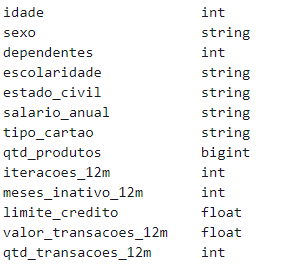

<h4>Observação:</h4>
<p>As colunas "<em>escolaridade</em>", "<em>estado_civil</em>" e "<em>salario_anual</em>" apresentam elementos faltantes que devem ser desconsiderados em suas consultas (query), para que não afetem a análise dos dados.</p>




<h2>Análise dos Dados:</h2>
<p>Agora levantarei alguns questionamentos a respeito da base de dados, para que possa extrair informações a seu respeito.</p>
<h4>Primeiro questão:</h4>
<p><strong>Qual faixa de renda tem maior representatividade na base de dados?</strong></p>
<p>Query: <code>SELECT DISTINCT salario_anual, COUNT(salario_anual) AS contagem FROM credito WHERE salario_anual <> 'na'GROUP BY salario_anual ORDER BY contagem DESC;</code></p>
<img align="center" width="60%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/p1.png?raw=true">
<p>O grupo de maior representatividade para essa base de dados, são clientes que recebem a baixo de R$ 40 mil por ano. Ou seja, se fosse observado essa base de dados como representação das informações de uma empresa de cartão de crédito (ou um banco), os seus esforços de marketing seriam voltados para esse público alvo.</p>
<br>
<h4>Segunda questão:</h4>
<p><strong>A base de dados é mais representada por clientes do sexo masculino, ou feminino?</strong></p>
<p>Query: <code>SELECT DISTINCT sexo, COUNT(sexo) AS contagem FROM credito GROUP BY sexo ORDER BY contagem DESC;</code></p>
<img align="center" width="60%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/p2-1.png?raw=true">
<img align="center" width="50%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/p2-2.png?raw=true">
<p>Com base nessas informações, é nítido que o grupo de maior representatividade são os clientes do sexo masculino. Sabendo disso, a empresa de cartões de crédito (ou banco) poderia segmentar o seu merchandising em duas categorias, uma voltada ao público masculino (para garantir a manutenção desse público), e outra voltada ao público feminino, com a criação de publicidades que incentivassem a sua adesão ao produto.</p>
<br>
<h4>Terceira questão:</h4>
<p><strong>Em relação ao sexo, qual a idade mínima, máxima e a média das idades nessa base de dados?</strong></p>
<img align="center" width="70%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/p3.png?raw=true">
<p>Os clientes de empresa de cartões de crédito (ou banco) apresenta um intervalo de idades muito próxima entre os sexos. Além disso, o seu público consumidor, apresenta uma faixa etária média, que não é muito jovem e nem idosa, isso implica em dizer que os seus usuários estão entrando no seu auge de carreira, ou seja, já dispõem de uma maturidade financeira, que permite um maior consumo no cartão de crédito.</p>
<br>
<h4>Quarta questão:</h4>
<p><strong>Existe uma relação direta entre nível de renda e limite de crédito?</strong></p>
<p>Query: <code>SELECT DISTINCT salario_anual, MAX(limite_credito) as limite_maximo FROM credito WHERE salario_anual <> 'na' GROUP BY salario_anual;</code></p>
<img align="center" width="60%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/p4.png?raw=true">
<p><strong>Gráfio de Representação:</strong></p>
<img align="center" width="50%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/p4-2.png?raw=true">
<p>Conforme o gráfico acima, é possível observar que existe uma certa relação entre o límite máximo de crédito e o nível de renda apresenta pelos clientes.</p>
<br>
<h4>Quinta questão:</h4>
<p><strong>Quais são as caracteristicas dos clientes com maiores limites de crédito (observação dos 10 primeiros)?</strong></p>
<p>Query: <code>SELECT DISTINCT MAX(limite_credito) as limite_maximo, escolaridade, tipo_cartao, sexo FROM credito WHERE escolaridade <> 'na' GROUP BY escolaridade, tipo_cartao, sexo ORDER BY limite_maximo DESC LIMIT 10;</code></p>
<img align="center" width="70%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/p5.png?raw=true">
<p>O que primeiro pode ser observado, é o fato do grau de escolaridade não ser fator determinante para o limite de crédito dos clientes, visto que, o cliente com maior limite de crédito não detém grau de instrução formal. Outro aspecto de destaque, são os tipos de cartões, na qual, a maioria são de categoria de entrada, ou seja, gold (sem anuidade) e blue (com anuidade, e pequenos benefícios). Entretanto, entre os clientes com maiores limites, existe um que aderiu à categoria platinum, que apresenta os melhores benefícios no seu uso.</p>
<br>
<h4>Sexta questão:</h4>
<p><strong>Quais são as caracteristicas dos clientes que detém os menores limites de crédito?</strong></p>
<p>Query: <code>SELECT DISTINCT MIN(limite_credito) as limite_minimo, escolaridade, tipo_cartao, sexo FROM credito WHERE escolaridade <> 'na' GROUP BY escolaridade, tipo_cartao, sexo ORDER BY limite_minimo ASC LIMIT 10;</code></p>
<img align="center" width="70%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/p6.png?raw=true">
<p>O que mais chama atenção, é o fato do tipo de cartão concedido para esses clientes, o blue, um modelo de entrada com anuidade. Esse aspecto, deve ser um método de proteção ao crédito adotado pela instituição, para se resguardar dos calotes e também gerar pequenos benefícios aos clientes entrantes e com baixa renda. Outro aspecto, que pode se perceber, é que existe uma proporção de equilíbrio  no número de clientes do sexo feminino e masculino com limite de crédito mais baixo. </p>
<br>
<h4>Setima questão:</h4>
<p><strong>Qual a proporção dos tipos de cartões em relação aos sexos dos clientes?</strong></p>
<p>Query: <code>SELECT DISTINCT tipo_cartao, sexo, count(*) AS contagem FROM credito GROUP BY tipo_cartao, sexo ORDER BY contagem DESC LIMIT 10;</code></p>
<img align="center" width="60%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/p7.png?raw=true">
<p>Como observado na análise da questão seis e na tabela acima, o modelo de cartão blue é a opção de entrada e com maior número de clientes registrado na base de dados. Já o tipo de cartão platinum (uma versão mais primium), apresenta apenas 2 registro, do sexo masculino e feminimo com nível de renda mais elevada.</p>
<br>
<h4>Oitava questão:</h4>
<p><strong>Quais são as característica dos clientes que mais utilizam o cartão?</strong></p>
<p>Query: <code>SELECT qtd_transacoes_12m, limite_credito, tipo_cartao, salario_anual, sexo FROM credito WHERE salario_anual <> 'na' ORDER BY qtd_transacoes_12m DESC LIMIT 10;</code></p>
<img align="center" width="75%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/p8.png?raw=true">
<p>A princípio, o que pode ser observável nas informações dessa base de dados, é que a renda anual e o limite de crédito do cartão não são fatores determinantes (ou empecilho) para quantidade de transações que os clientes podem realizar.  Outro aspecto que chama atenção, é o fato dos clientes que mais utilizaram o cartão nos últimos 12 meses, são usuários do tipo blue. Além disso, o usuário que mais utilizou o cartão foi uma mulher, provando que o incentivo de publicidade voltadas ao sexo feminino é um fator importante para geração de receita, já que ela apresentaram um bom ranqueamento no número de transações feitas em 12 meses.</p>
<br>
<h4>Nona questão:</h4>
<p><strong>Quais são as característica dos clientes que menos utilizam o cartão para transações?</strong></p>
<p>Query: <code>SELECT qtd_transacoes_12m, limite_credito, tipo_cartao, salario_anual, sexo FROM credito WHERE salario_anual <> 'na' ORDER BY qtd_transacoes_12m ASC LIMIT 10;</code></p>
<img align="center" width="75%" src="https://github.com/SergioAdauto/credit-da-sql/blob/main/prints/p9.png?raw=true">
<p>Os clientes que apresentam uma faixa de renda mais elevada, tendem a não utilizar o cartão de crédito com muita frequência, esse aspecto pode ser um reflexo do tipo de cartão disponibilizado para esse nicho de usuários, visto que, o modelo blue não apresentam muito benefícios atrativos para essa categoria de usuários. Por tanto, uma sugestão seria a empresa focar em usuários de renda mais baixa, que atendem as características do modelo de cartão de entrada (tipo blue). Outra opção, seria a empresa estudar métodos de disponibilização dos tipos de cartões mais avançados (como Silver e Platinum), usando como base a renda do usuário, nível de score e outros aspectos.</p>

<h2>Conclusão</h2>
Com base nas análises acima, foram extraindos os seguintes insights:
<ul>
    <li>O grupo de clientes com maior representatividade possuem renda anual inferior a R$ 40 mil;
    <li>A maioria dos clientes são do sexo masculino;
    <li>A média das idades dos clientes é de 46 anos, ou seja, um público economicamente ativo;
    <li>Os clientes que detém uma maior renda, também vão dispor de limite de crédito mais elevado;
    <li>O nível de instrução escolar não afeta a determinação do limite de crédito;
    <li>Os clientes do sexo masculino apresentam os maiores limites de crédito;
    <li>O modelo de cartão mais disponibilizado é o Blue;
    <li>Clientes com rendas mais baixo utilizam com mais frequência o cartão;
</ul>
<p>Somando a essas informações, um ponto de sugestão que poderia ser levantado para essa empresa, seria o fato de investir em publicidades mais voltadas ao público feminino, visto que, o cliente que mais utilizou o cartão era do sexo feminino, provando que a entrada de mais usuárias possibilitaria a capitação de mais recursos para empresa.</p>